In [4]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

(-0.5, 1169.5, 1087.5, -0.5)

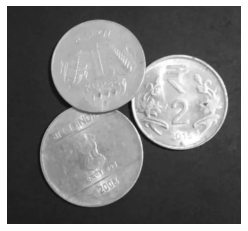

In [13]:
img = cv2.imread('coins.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(gray, cmap='gray')
plt.axis('off')

(-0.5, 1169.5, 1087.5, -0.5)

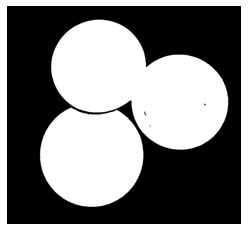

In [14]:
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel, iterations = 1)

plt.imshow(closing, cmap='gray')
plt.axis('off')

(-0.5, 1169.5, 1087.5, -0.5)

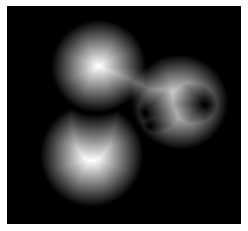

In [15]:
dist = cv2.distanceTransform(closing, cv2.DIST_L2, 3)

plt.imshow(dist, cmap='gray')
plt.axis('off')

In [19]:
ret, dist1 = cv2.threshold(dist, 0.6*dist.max(), 255, 0)

(-0.5, 1169.5, 1087.5, -0.5)

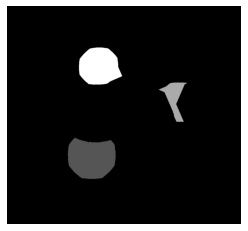

In [26]:
markers = np.zeros(dist.shape, dtype=np.int32)
dist_8u = dist1.astype('uint8')
contours, _ = cv2.findContours(dist_8u, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    cv2.drawContours(markers, contours, i, (i+1), -1)
    
plt.imshow(markers, cmap='gray')
plt.axis('off')

In [27]:
markers = cv2.circle(markers, (15,15), 5, len(contours)+1, -1)

(-0.5, 1169.5, 1087.5, -0.5)

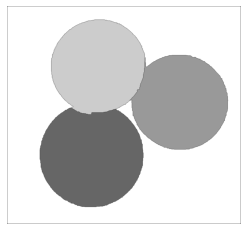

In [33]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [0,0,255]

plt.imshow(markers, cmap='gray')
plt.axis('off')